In [2]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [3]:
df <- '/oak/stanford/groups/mrivas/ukbb24983/phenotypedata/master_phe/master.20200522.phe' %>%
fread(colClasses=c('#FID'='character', 'IID'='character'), select=c('#FID', 'IID', paste0('PC', 1:10), 'population')) %>%
rename('FID'='#FID')


In [4]:
df %>% count(population)

population,n
<chr>,<int>
african,6497
e_asian,1154
e_asian_outlier,618
non_british_white,24905
others,28467
s_asian,7885
s_asian_outlier,77
white_british,337138
NA,110029


In [5]:
p_WB <- df %>% 
drop_na(population) %>%
filter(!str_detect(population, 'outlier')) %>%
filter(population == 'white_british') %>%
ggplot(aes(x=PC1, y=PC2)) +
geom_point(alpha=.1) +
theme_bw()

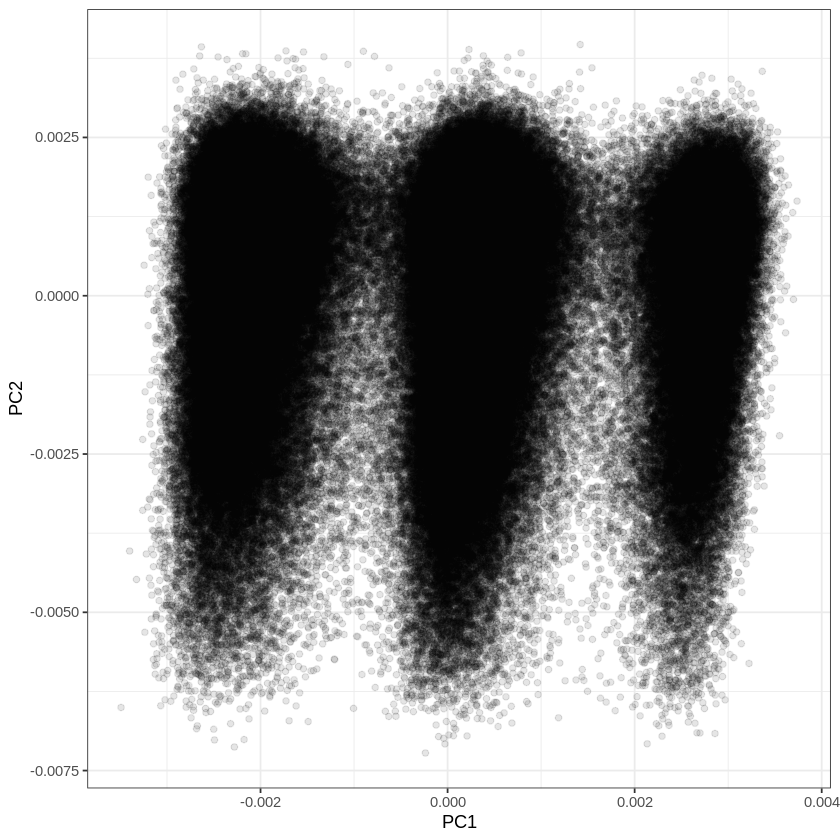

In [6]:
p_WB

Warning message:
“Ignoring unknown parameters: geom”Warning message:
“Ignoring unknown aesthetics: fill”

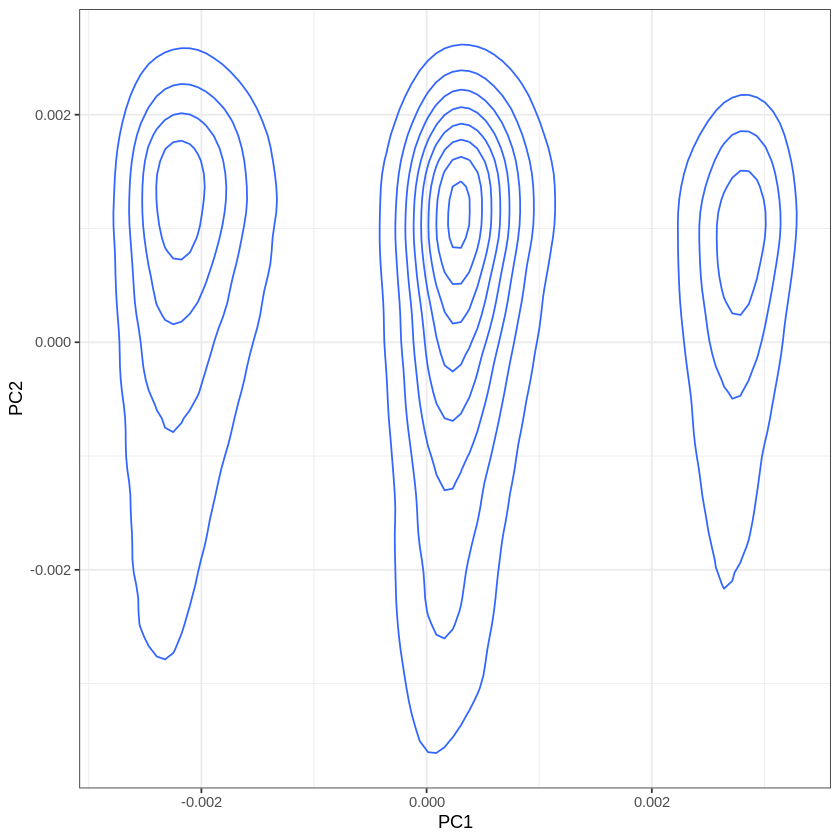

In [12]:
df %>% 
drop_na(population) %>%
filter(!str_detect(population, 'outlier')) %>%
filter(population == 'white_british') %>%
ggplot(aes(x=PC1, y=PC2)) +
geom_density_2d(aes(fill = after_stat(level)), geom = "polygon") +
theme_bw()

In [9]:
p <- df %>% 
drop_na(population) %>%
filter(!str_detect(population, 'outlier')) %>%
filter(population != 'e_asian') %>%
ggplot(aes(x=PC1, y=PC2)) +
geom_point(alpha=.01) +
theme_bw()+
facet_wrap(~population, ncol = 3)

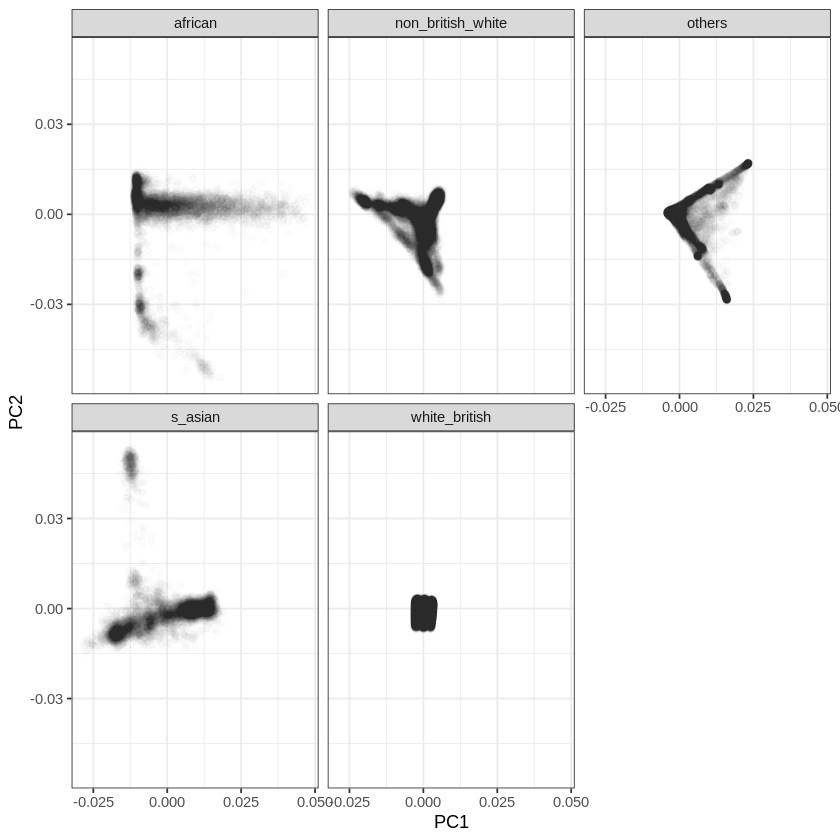

In [10]:
p

In [1]:
1

[1] 1